In [1]:
%load_ext watermark
%watermark

2019-05-17T17:14:34+02:00

CPython 3.6.5
IPython 6.4.0

compiler   : GCC 7.2.0
system     : Linux
release    : 5.0.13-arch1-1-ARCH
machine    : x86_64
processor  : 
CPU cores  : 4
interpreter: 64bit


# VISUALIZACIÓN BÁSICA DE DATOS

## Carga de Datos y Preparacion de DataSet
Vamos a usar un dataset clasico para empezar a aprender técnicas de visualización. Se trata del Boston Housing Dataset. Recopilado en 1976 y publicado en [Berkeley](https://www.law.berkeley.edu/files/Hedonic.PDF)

Consiste en mediciones de distintas zonas del área de Boston, teniendo como variables independientes un conjunto de mediciones de la habitabilidad de dichas zonas, y como variable independiente el valor medio de las casas en dicha zona.

En concreto vamos a usar un [dataset actualizado](http://lib.stat.cmu.edu/datasets/boston_corrected.txt) que incluye la geolocalización estimada de las mediciones.

In [2]:
import pandas as pd
df = pd.read_csv("boston_dataset.csv")
df.head()

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


Renombramos las columnas para facilitar el manejo.

In [3]:
df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
df.dtypes

CIUDAD                   object
LON                     float64
LAT                     float64
VALOR_MEDIANO           float64
INDICE_CRIMEN           float64
PCT_ZONA_RESIDENCIAL    float64
PCT_ZONA_INDUSTRIAL     float64
RIO_CHARLES               int64
OXIDO_NITROSO_PPM       float64
N_HABITACIONES_MEDIO    float64
PCT_CASAS_40S           float64
DIS                     float64
DIS_AUTOPISTAS            int64
CARGA_FISCAL              int64
RATIO_PROFESORES        float64
PCT_NEGRA               float64
PCT_CLASE_BAJA          float64
dtype: object

### Cómo elegir el gráfico

Como podemos ver, la guía se divide en cuatro categorías principales y luego se clasifican los distintos métodos de visualización que mejor representan cada una de esas categorías. Veamos un poco más en detalle cada una de ellas:

- *Distribuciones*: En esta categoría intentamos comprender como los datos se distribuyen. Se suelen utilizar en el comienzo de la etapa de exploración de datos, cuando queremos comprender las variables. Aquí también nos vamos a encontrar con variables de dos tipos cuantitativas y categóricas. Dependiendo del tipo y cantidad de variables, el método de visualización que vamos a utilizar.  

- *Comparaciones*: En esta categoría el objetivo es comparar valores a través de diferentes categorías y con el tiempo (tendencia). Los tipos de gráficos más comunes en esta categoría son los diagramas de barras para cuando estamos comparando elementos o categorías y los diagramas de puntos y líneas cuando comparamos variables cuantitativas.  

- *Relaciones*: Aquí el objetivo es comprender la relación entre dos o más variables. La visualización más utilizada en esta categoría es el gráfico de dispersión.  

- *Composiciones*: En esta categoría el objetivo es comprender como esta compuesta o distribuida una variable; ya sea a través del tiempo o en forma estática. Las visualizaciones más comunes aquí son los diagramas de barras y los gráficos de tortas.  

Fuente: https://relopezbriega.github.io/blog/2016/09/18/visualizaciones-de-datos-con-python/



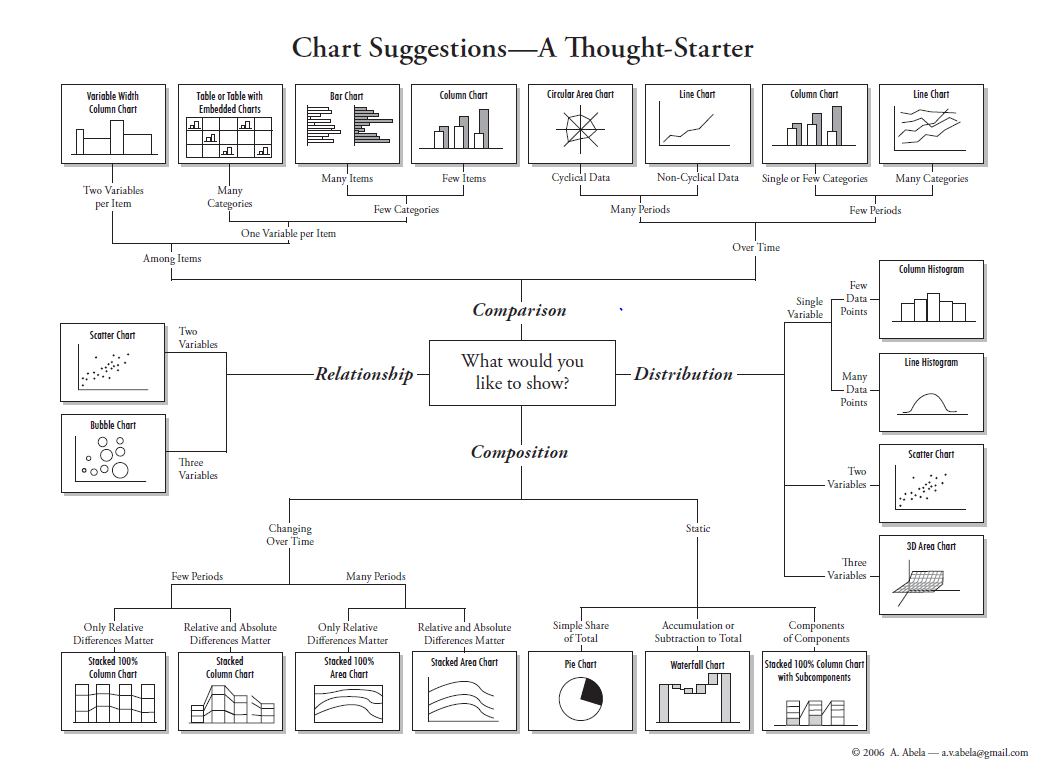

In [28]:
from IPython.display import Image
Image("../../RESOURCES/chart-chooser-data-visualization.png")

[Aquí hay una herramienta online para ayudar a decidir el tipo de gráfico a usar](http://labs.juiceanalytics.com/chartchooser/index.html)


## Matplotlib
[Matplotlib](https://matplotlib.org/) es una librería para generar gráficos a partir de conjuntos de datos, bien sea datos contenidos en arrays de numpy o en dataframes de Pandas.
En los siguientes casos utilizaremos esta librería para mostrar información del dataframe que hemos cargado con anterioridad on Pandas.


In [6]:
?matplotlib

In [7]:
import matplotlib.pyplot as plt

### Scatter Plot / Gráfico de dispersión

Los gráficos de dispersión son una de las mejores formas de representar la relación entre dos variables.
Según [Wikipedia](https://es.wikipedia.org/wiki/Diagrama_de_dispersi%C3%B3n) Un diagrama de dispersión se emplea cuando una o varias variables está bajo el control del experimentador. Si existe un parámetro que se incrementa o disminuye de forma sistemática por el experimentador, se le denomina parámetro de control o variable independiente y habitualmente se representa a lo largo del eje horizontal (eje de las abscisas). La variable medida o dependiente usualmente se representa a lo largo del eje vertical (eje de las ordenadas). Si no existe una variable dependiente, cualquier variable se puede representar en cada eje y el diagrama de dispersión mostrará el grado de correlación (no causalidad) entre las dos variables.

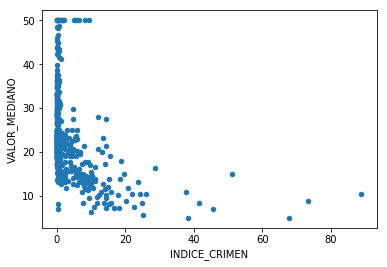

In [8]:
#Usamos la funcion scatter especificando los ejex `x` e `y`
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")

In [9]:
#Este comando adapta la grafica al documento
%matplotlib notebook

<IPython.core.display.Javascript object>


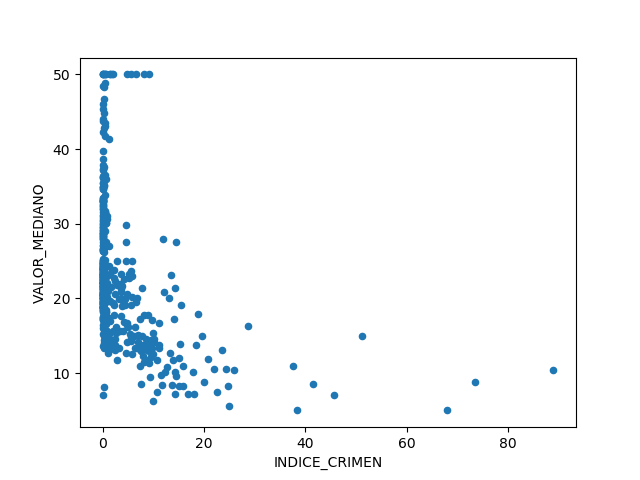

In [10]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")

### Matriz de dispersión

Un gráfico de matriz de dispersión es una herramienta de exploración de datos que permite comparar varios datasets para buscar patrones y relaciones.

El gráfico de matriz de dispersión (SPM) acepta una capa o una tabla como entrada. Seleccione los campos que desee utilizar en el gráfico. El gráfico tiene dos componentes principales: una matriz de gráficos de dispersión pequeños para cada uno de los campos y una ventana Vista previa mayor que muestra el gráfico de dispersión para un par de campos seleccionados con mayor detalle. También puede habilitar el trazado de histogramas, mostrando la distribución de valores para cada uno de los campos.

<IPython.core.display.Javascript object>


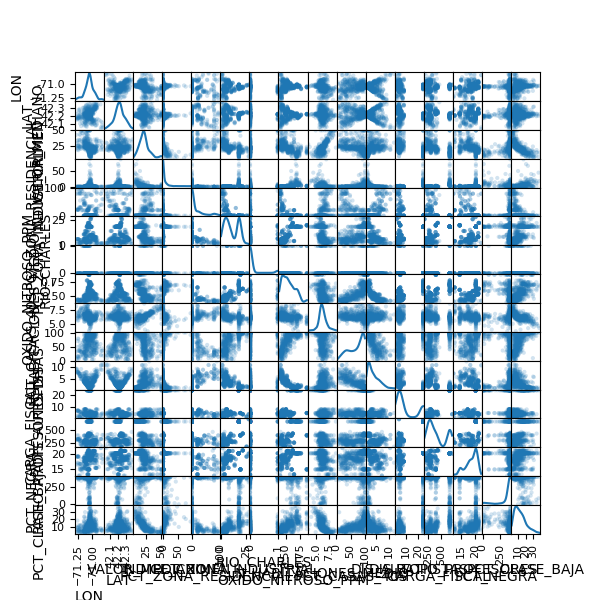

In [27]:
from pandas.plotting import scatter_matrix

sm = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [12]:
sm

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfcd30a2b0>,
      dtype=object)

Este es uno de los problemas de matplotlib, que su api es bastante complicada si quieres hacer algo que se salga de lo corriente. Por ejemplo, en este caso necesitamos un montón de código para rotar las etiquetas de los ejes

<IPython.core.display.Javascript object>


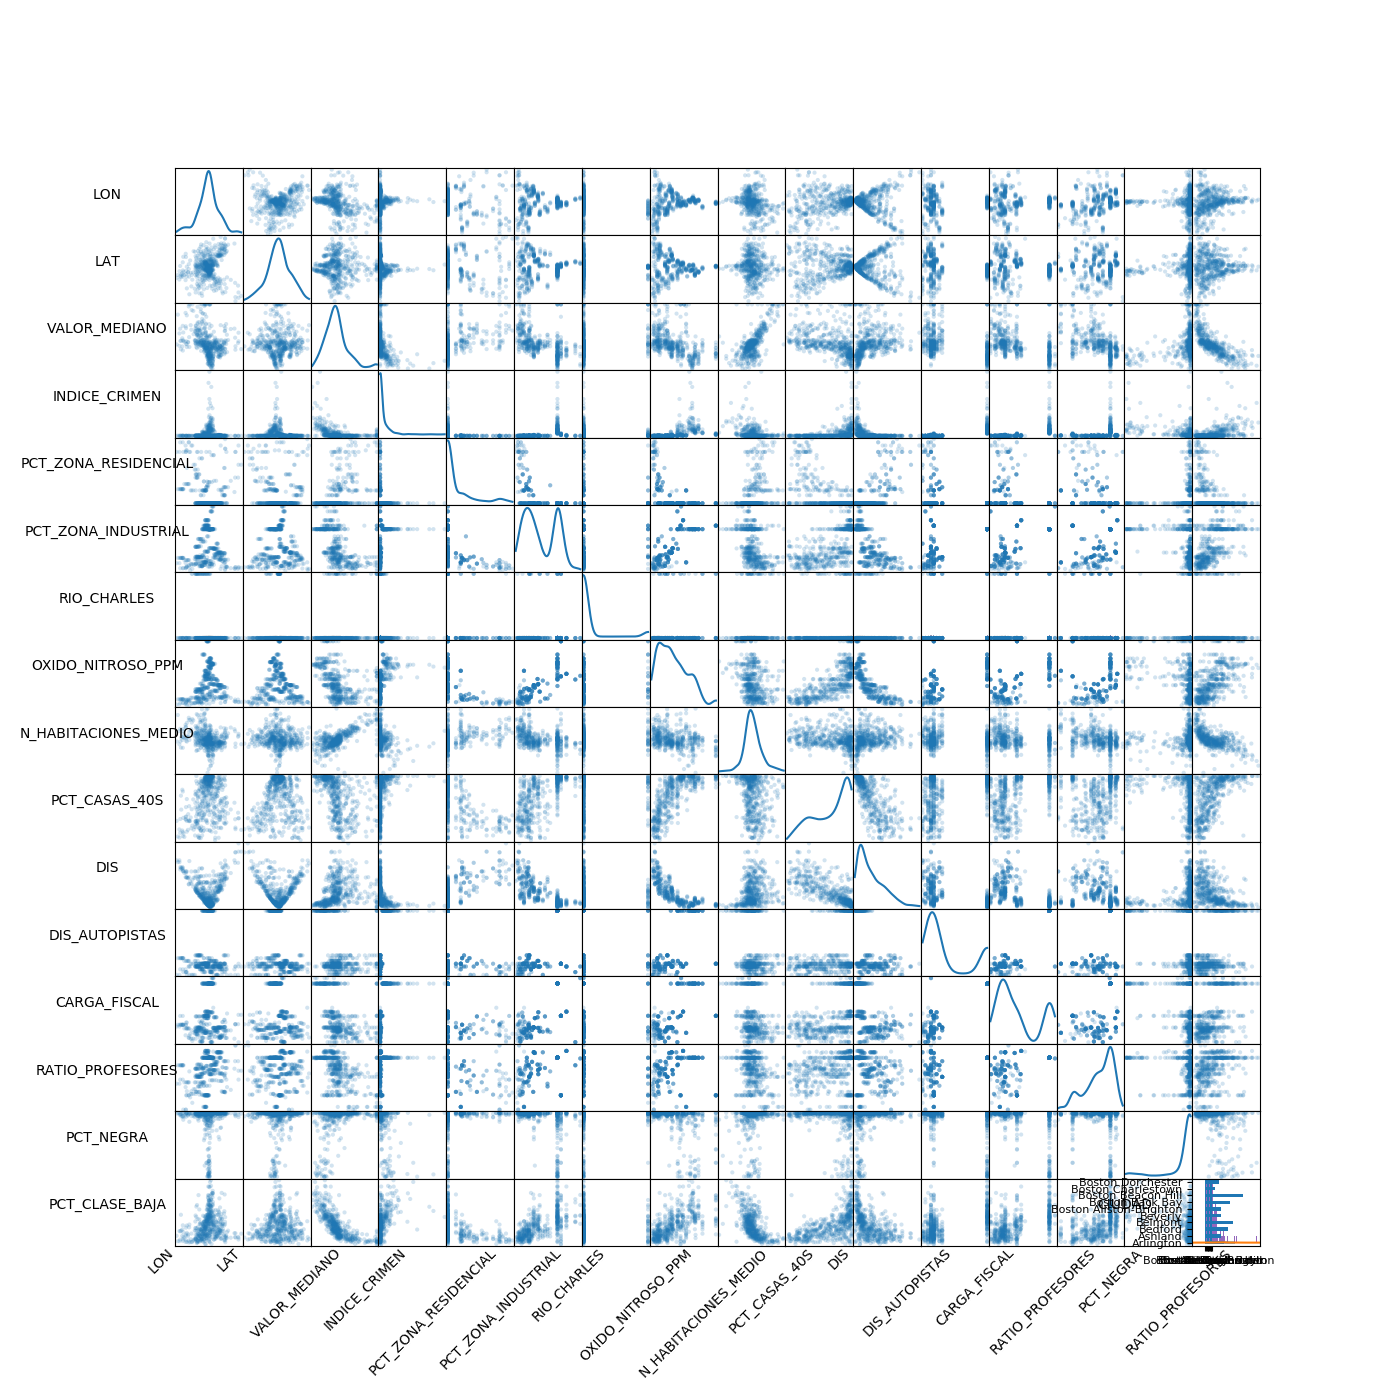

In [13]:
sm = scatter_matrix(df, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

In [14]:
df.VALOR_MEDIANO.plot.kde();

### Histograma

Los histogramas se usan para representar la distribucion de una variable, esto es, que rango de valores tiene, cuales son los valores más comunes
Segun [Wikipedia](https://es.wikipedia.org/wiki/Histograma) un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua (como la longitud o el peso). De esta manera ofrece una visión de grupo permitiendo observar una preferencia, o tendencia, por parte de la muestra o población por ubicarse hacia una determinada región de valores dentro del espectro de valores posibles (sean infinitos o no) que pueda adquirir la característica. Así pues, podemos evidenciar comportamientos, observar el grado de homogeneidad, acuerdo o concisión entre los valores de todas las partes que componen la población o la muestra, o, en contraposición, poder observar el grado de variabilidad, y por ende, la dispersión de todos los valores que toman las partes, también es posible no evidenciar ninguna tendencia y obtener que cada miembro de la población toma por su lado y adquiere un valor de la característica aleatoriamente sin mostrar ninguna preferencia o tendencia, entre otras cosas.

In [15]:
df.N_HABITACIONES_MEDIO.plot.hist()

podemos especificar cuantos grupos queremos en el histograma

In [16]:
df.INDICE_CRIMEN.plot.hist(bins=100)

Tambien podemos filtrar el gráfico poniendo límites a los ejes

In [17]:
df.INDICE_CRIMEN.plot.hist(bins=100, xlim=(0,20))

### Gráfico de barras/columnas

Los gráficos de barras se utilizan comúnmente para representar y comparar una variable entre distintos grupos

In [18]:
valor_por_ciudad = df.groupby("CIUDAD")["VALOR_MEDIANO"].mean()
valor_por_ciudad.head()

CIUDAD
Arlington    25.2
Ashland      21.4
Bedford      30.1
Belmont      36.2
Beverly      20.8
Name: VALOR_MEDIANO, dtype: float64

In [19]:
valor_por_ciudad.head(10).plot.bar()

In [20]:
valor_por_ciudad.head(10).plot.barh()

### Gráfico de linea

Los gráficos de linea se usan principalmente para representar tendencias, esto es, se usan para variables que varian con el tiempo


In [21]:
df.groupby("RATIO_PROFESORES").VALOR_MEDIANO.mean().plot.line();

### Diagrama de caja (Box Plot)

Los diagramas de caja son útiles a la hora de representar grupos de datos y comparar entre ellos. Otra ventaja de los boxplots es que identifican de forma sencilla si una variable tiene muchos outliers, esto es, elementos que se alejan de los valores frecuentes de dicha variable.

In [22]:
df["VALOR_CUANTILES"] = pd.qcut(df.VALOR_MEDIANO, 5)

<IPython.core.display.Javascript object>


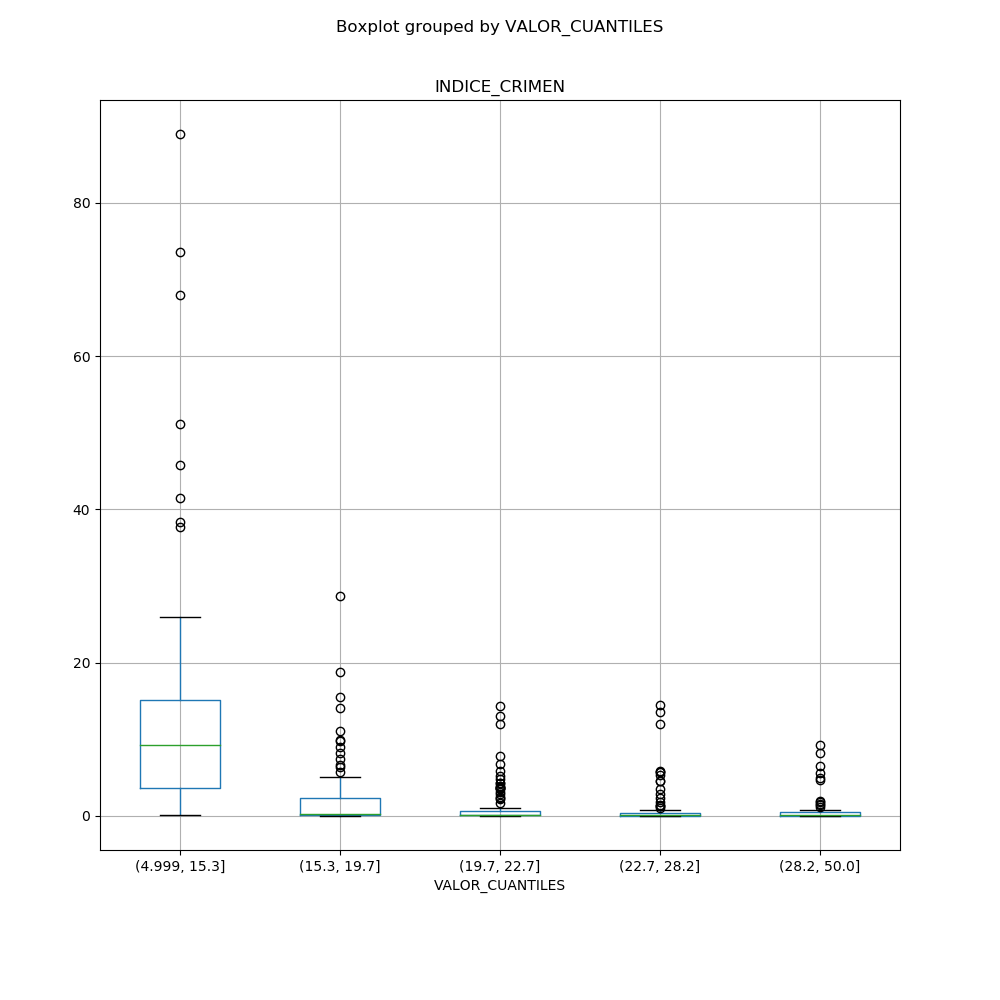

In [25]:
df.boxplot(column="INDICE_CRIMEN", by="VALOR_CUANTILES", figsize=(10,10))

### Gráfico circular

Un gráfico circular es una representación gráfica de una serie de cantidades y consiste en un círculo dividido en varios sectores, cuyo tamaño se corresponde con las proporciones de las cantidades. Básicamente, este tipo de gráfico muestra la relación porcentual entre las partes con relación a su conjunto.

<IPython.core.display.Javascript object>


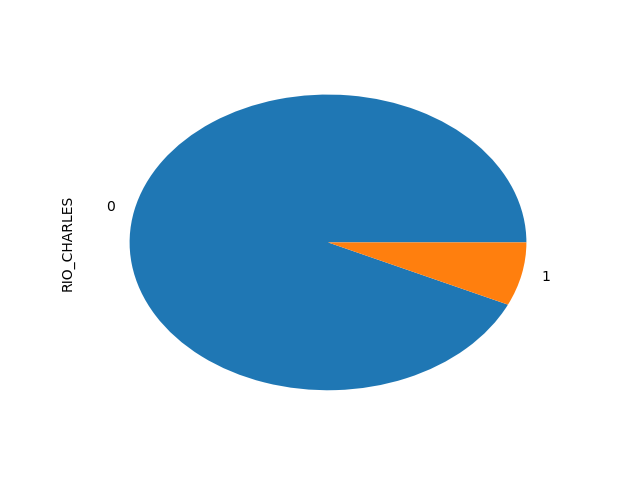

In [26]:
df.RIO_CHARLES.value_counts().plot.pie()

https://conda-forge.github.io/
    
    https://anaconda.org/conda-forge/repo
        https://seaborn.pydata.org/
            
            http://bokeh.pydata.org/en/latest/
                
                https://altair-viz.github.io/
                    
                    https://plot.ly/python/getting-started/


https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
`conda install -c conda-forge ipywidgets`

https://github.com/bokeh/bokeh/blob/0.12.5/examples/howto/notebook_comms/Jupyter%20Interactors.ipynb